In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
try:
  import coffea
except ImportError as e:
  !pip install coffea
  import coffea
print (coffea.__version__)

0.7.21


In [3]:
import uproot
import awkward as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import vector
import hist
import mplhep as hep

print (uproot.__version__)
print (ak.__version__)

4.3.7
1.10.3


In [4]:
file = uproot.open("muon_data_tree.root")


print(file.keys())
tree = file["tree"]
print(tree.keys())  # Lista as branches (colunas)

# Ler algumas entradas para verificar se os dados estão corretos
df_r = tree.arrays(["muon1_pt", "muon1_eta", "muon1_phi", "pt_dimu"], library="pd")  # Carregar em um DataFrame
print(df_r.head())  # Visualizar as primeiras linhas do DataFrame

['tree;1']
['num_final_events', 'muon1_pt', 'muon1_eta', 'muon1_phi', 'muon2_pt', 'muon2_eta', 'muon2_phi', 'pt_dimu', 'eta_dimu', 'mass_dimu']
    muon1_pt  muon1_eta  muon1_phi    pt_dimu
0  52.556774  -1.429199  -2.723145  36.169895
1  50.203129  -0.656128   1.626221  14.304790
2  53.714878   0.159729  -1.947510  29.602020
3  48.502796  -1.802002   1.400146  13.670808
4  43.287487  -0.061668   1.378662   3.742076


In [5]:
len(df_r)

403907

In [6]:
%time
#Download ROOT
![ -f root_v6.30.04.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz ] || wget -nc https://root.cern/download/root_v6.30.04.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz
!tar -xzf root_v6.30.04.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 13.6 µs
--2024-11-04 23:36:28--  https://root.cern/download/root_v6.30.04.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz
Resolving root.cern (root.cern)... 188.184.49.144, 2001:1458:d00:55::100:c
Connecting to root.cern (root.cern)|188.184.49.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 307307012 (293M) [application/x-gzip]
Saving to: ‘root_v6.30.04.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz’

root_v6.30.04.Linux 100%[===================>] 293.07M  14.3MB/s    in 20s     

2024-11-04 23:36:48 (14.3 MB/s) - ‘root_v6.30.04.Linux-ubuntu22.04-x86_64-gcc11.4.tar.gz’ saved [307307012/307307012]



In [8]:
import ROOT

Welcome to JupyROOT 6.30/04


In [9]:
from ROOT import TH1F
from ROOT import TFile
from ROOT import TLorentzVector
from ROOT import TLegend
from ROOT import RooFit
from ROOT import RooDataHist
from ROOT import RooDataSet
from ROOT import RooRealVar
from ROOT import RooArgList
from ROOT import RooArgSet
from ROOT import RooAddPdf
from ROOT import RooExponential
from ROOT import RooGaussian
from ROOT import RooPlot
from ROOT import RooCBShape
from ROOT import RooChi2Var
from ROOT import TLatex

In [10]:
ROOT.ROOT.EnableImplicitMT(4) 

In [11]:
df_r = tree.arrays(["muon1_pt", "muon1_eta", "muon1_phi", "pt_dimu", "mass_dimu"], library="pd")  # Carregar em um DataFrame
print(df_r.head()) 

    muon1_pt  muon1_eta  muon1_phi    pt_dimu  mass_dimu
0  52.556774  -1.429199  -2.723145  36.169895  91.075134
1  50.203129  -0.656128   1.626221  14.304790  89.062180
2  53.714878   0.159729  -1.947510  29.602020  91.994675
3  48.502796  -1.802002   1.400146  13.670808  91.716125
4  43.287487  -0.061668   1.378662   3.742076  90.336884


In [12]:
mass_dimu = df_r["mass_dimu"]

Info in <TCanvas::Print>: png file invariant_mass.png has been created


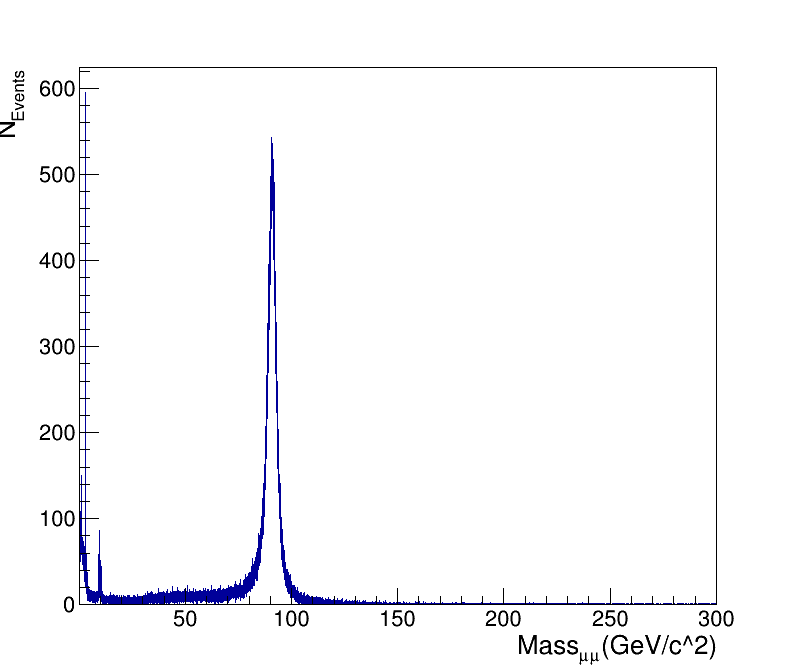

In [13]:
# Nome único para cada execução para evitar conflitos
hist_name = "invariant_mass_histogram"
canvas_name = "invariant_mass_canvas"

# Verifica e remove o histograma existente
if ROOT.gROOT.FindObject(hist_name):
    ROOT.gROOT.FindObject(hist_name).Delete()

# Verifica e remove o canvas existente
if ROOT.gROOT.FindObject(canvas_name):
    ROOT.gROOT.FindObject(canvas_name).Delete()

# Criação do histograma com ROOT
bins = 30000
low = 0.25
up = 300.0
hist = ROOT.TH1F(hist_name, ";Mass_{#mu#mu}(GeV/c^2);N_{Events}",bins , low, up)

hist.GetXaxis().SetTitleSize(0.042)
hist.GetYaxis().SetTitleSize(0.042)
hist.SetStats(False)

# Preenchendo o histograma com os dados de massa invariante
for mass in mass_dimu:
    hist.Fill(mass)

# Criação do canvas e desenho do histograma
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetTextFont(42)
canvas = ROOT.TCanvas(canvas_name, "Invariant Mass", 800, 700)
#canvas1.SetLogx()
#canvas1.SetLogy();
hist.Draw()

# Atualiza o canvas para garantir que o gráfico seja exibido
canvas.Update()
'''
label = ROOT.TLatex()
label.SetTextAlign(22)
#label.DrawLatex(0.55, 3.0e3, "#eta")
label.DrawLatex(0.77, 3.0e3, "#rho,#omega")
label.DrawLatex(1.20, 4.0e3, "#phi")
label.DrawLatex(4.00, 7.0e3, "J/#psi")
label.DrawLatex(4.60, 1.0e3, "#psi'")
label.DrawLatex(13.0, 0.9e3, "Y(1,2,3S)")
label.DrawLatex(91.0, 6.5e3, "Z")
label.SetNDC(True)
label.SetTextAlign(11)
label.SetTextSize(0.03)
label.DrawLatex(0.10, 0.92, "#bf{CMS Open Data}")
label.SetTextAlign(31)
label.DrawLatex(0.90, 0.92, "#sqrt{s} = 13 TeV, L_{int} = 4.7 fb^{-1}");
'''

canvas.Draw()

# Caso queira salvar o resultado
canvas.SaveAs("invariant_mass.png")

In [14]:
jpsi_pdg_mass =3.0969 #3096.900/1000
m_min = 2.9
m_max = 3.3
jpsi_bins = int((m_max - m_min)/0.05)
print(jpsi_bins)

# Definindo a variável de massa para RooFit
#Create a Mass variable that RooFit can use, and importing the relevant dataset
mass = ROOT.RooRealVar("mass", "m_{#mu^{+}#mu^{-}}", m_min, m_max, "GeV/c^{2}")
# Convertendo o histograma em um dataset do RooFit
data = ROOT.RooDataHist("data", "dataset with mass", ROOT.RooArgList(mass), hist)

7
[#1] INFO:DataHandling -- RooDataHist::adjustBinning(data): fit range of variable mass expanded to nearest bin boundaries: [2.9,3.3] --> [2.89779,3.30745]


In [15]:
## Sinal PDF : Crystal Ball + Gaussian
frac_gauss = ROOT.RooRealVar("frac_gauss", "", 0.4, 0.0, 1.0)
mean = ROOT.RooRealVar("mean", "",jpsi_pdg_mass , m_min, m_max)
sigma_gauss = ROOT.RooRealVar("sigma gauss", "",0.019 , 0.000001, 1.0)

frac_cb = ROOT.RooRealVar("frac_cb", "", 0.6, 0.0, 1.0)
sigma_cb = ROOT.RooRealVar("sigma cb", "",0.019 , 0.000001, 1.0)
alpha = ROOT.RooRealVar("alpha", "",1.4 , 0.0, 10.0)
n = ROOT.RooRealVar("n", "", 20 , 0, 150)
n.setConstant(True)

signal1 = ROOT.RooGaussian("gauss", "", mass, mean, sigma_gauss)
signal2 = ROOT.RooCBShape("crystal ball", "", mass, mean, sigma_cb,alpha,n)

In [16]:
#Background PDF Model
exp_c0 = RooRealVar("exp_c0", "", -3,-5,5)
bkg = ROOT.RooExponential("bkg", "",mass,exp_c0)

In [17]:
model = ROOT.RooAddPdf("model", "", ROOT.RooArgList(signal1,signal2,bkg),ROOT.RooArgList(frac_gauss,frac_cb), ROOT.kTRUE)

In [19]:
fit_result = model.fitTo(data, ROOT.RooFit.Save())

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (gauss,crystal ball,bkg)
Minuit2Minimizer: Minimize with max-calls 3500 convergence for edm < 1 strategy 1
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = -8501.44060042308047
Edm   = 8.74606438514167274e-05
Nfcn  = 93
alpha	  = 1.30358	 +/-  0.0910696	(limited)
exp_c0	  = -0.368367	 +/-  0.323604	(limited)
frac_cb	  = 0.75303	 +/-  0.0159173	(limited)
frac_gauss	  = 0.147666	 +/-  0.0499499	(limited)
mean	  = 3.0931	 +/-  0.000617616	(limited)
sigma cb	  = 0.0395435	 +/-  0.00179358	(limited)
sigma gauss	  = 0.017141	 +/-  0.00284929	(limited)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =      -8501.440406 Edm =   0.0003588837419 NCalls =     25
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : -8501.440406
  Edm           : 0.0003588837419
  Internal parameters:	[    -0.8319197661   -0.07385759651     0.5308072539    -0.7817736232   -0.03450030119     -1.170444173     -1.308166179]	
  Internal gradient  :	[      0.454893603   -0.07844271127     0.6950748044     0.2770807166      3.320749603     -3.136602547     0.7689934452]	
  Internal covariance matrix:
[[  0.00070607986              0              0              0              0              0              0]
 [              0    0.005537254              0              0              0              0              0]
 [              0              0   0.0010463623              0              0              0              0]
 [              0              0    

nr de par: 7
chi sqare: 0.648474014431997
chi_square/n_param 0.7819833703444671
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (gauss,crystal ball)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (bkg)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
frame_mass_f5962a0[mass] = (::,::,::,::)


Info in <TCanvas::Print>: png file M_JPsi_fit.png has been created


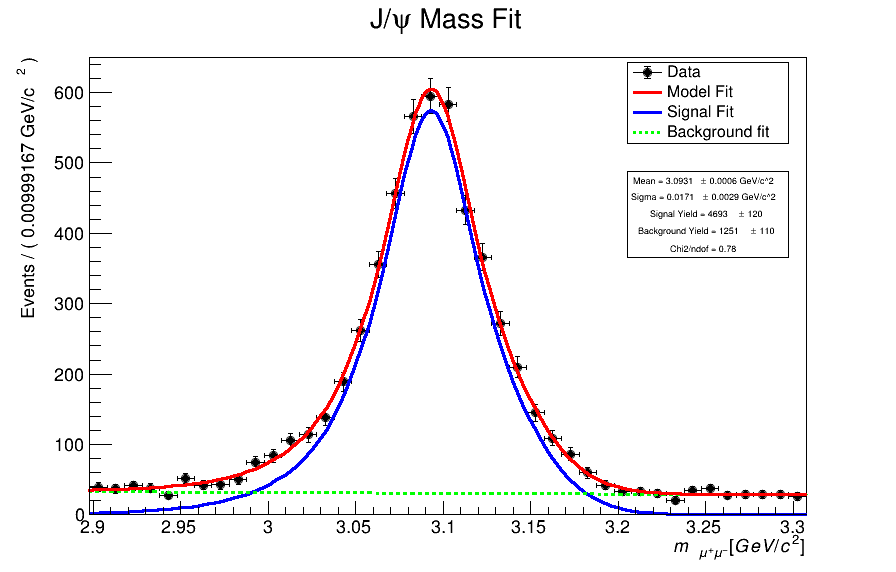

In [20]:
colors = {"model" : 2, "signal" : 4, "background" : 3}
styles = {"model" : 1, "signal" : 1, "background" : 2}

ca = ROOT.TCanvas("can", "",900,600)

frame = mass.frame(ROOT.RooFit.Title("J/#psi Mass Fit"), ROOT.RooFit.Bins(100))
frame.GetXaxis().SetTitle("m_{#\mu^+\mu^-} [GeV/c^2]")

# Data
data.plotOn(frame, ROOT.RooFit.Name("Data"), ROOT.RooFit.DataError(ROOT.RooAbsData.SumW2))

# Signal
model.plotOn(frame, ROOT.RooFit.Name("Signal"), ROOT.RooFit.Components("gauss,crystal ball"), ROOT.RooFit.LineStyle(styles["signal"]), ROOT.RooFit.LineColor(colors["signal"]))

# Background
model.plotOn(frame, ROOT.RooFit.Name("Background"), ROOT.RooFit.Components("bkg"), ROOT.RooFit.LineStyle(styles["background"]), ROOT.RooFit.LineColor(colors["background"]))

# Model
model.plotOn(frame, ROOT.RooFit.Name("Model"), ROOT.RooFit.LineStyle(styles["model"]), ROOT.RooFit.LineColor(colors["model"]))

frame.Print()

# Extraindo os parâmetros ajustados e seus erros
mean_val = mean.getValV()
mean_err = mean.getError()
sigma_val = sigma_gauss.getValV()
sigma_err = sigma_gauss.getError()

import math

# Cálculo do número total de eventos (n_total)
n_total = data.sumEntries()

# Cálculo do yields do sinal
frac_cb_val = frac_cb.getVal()  # Valor de frac_cb
frac_gauss_val = frac_gauss.getVal()  # Valor de frac_gauss
frac_cb_err = frac_cb.getError()
frac_gauss_err = frac_gauss.getError()

# Número de eventos de sinal
nsignal = n_total * (frac_cb_val + (1 - frac_cb_val) * frac_gauss_val)
# Propagação de erros para o sinal
nsignal_err = n_total * math.sqrt((frac_cb_err)**2 + ((1 - frac_cb_val) * frac_gauss_err)**2)

# Número de eventos de fundo (N_total - N_signal)
#nbackground = n_total - nsignal ou N_back = n_total (1 - fgauss) * (1 - fcrystall) * fexponential

nbackground = n_total * (1 - frac_gauss_val) * (1 - frac_cb_val)

# Propagação de erros para o fundo
nbackground_err = n_total * math.sqrt(
    ((1 - frac_cb_val) * frac_gauss_err) ** 2 +
    ((1 - frac_gauss_val) * frac_cb_err) ** 2
)


## ChiSquare computation
n_param = fit_result.floatParsFinal().getSize()
print("nr de par:", n_param)
reduce_chi_square = frame.chiSquare(n_param)
print("chi sqare:", frame.chiSquare() )
print("chi_square/n_param", reduce_chi_square )

frame.Draw()

## Legendas

#legend_text = ROOT.TPaveText(0.65, 0.6, 0.9, 0.85, "NDC")
#legend_text = ROOT.TPaveText(0.75, 0.25, 0.9, 0.35, "NDC")
legend_text = ROOT.TPaveText(0.7, 0.55, 0.88, 0.7, "NDC")
legend_text.AddText(f"Mean = {mean_val:.4f} #pm {mean_err:.4f} GeV/c^2")
legend_text.AddText(f"Sigma = {sigma_val:.4f} #pm {sigma_err:.4f} GeV/c^2")
# Adicionar o rendimento do sinal e do fundo
legend_text.AddText(f"Signal Yield = {nsignal:.0f} #pm {nsignal_err:.0f}")
legend_text.AddText(f"Background Yield = {nbackground:.0f} #pm {nbackground_err:.0f}")
#legend_text.AddText(f"nr de param = {n_param:.2f}")
legend_text.AddText(f"Chi2/ndof = {reduce_chi_square:.2f}")

legend_text.SetFillColor(0)
legend_text.SetBorderSize(1)
legend_text.Draw()

#leg = ROOT.TLegend(0.7, 0.7, 0.88, 0.89)
leg = ROOT.TLegend(0.7, 0.75, 0.88, 0.89)
leg.AddEntry(frame.findObject("Data"), "Data", "LEP")
leg.AddEntry(frame.findObject("Model"), "Model Fit", "L")
leg.AddEntry(frame.findObject("Signal"), "Signal Fit", "L")
leg.AddEntry(frame.findObject("Background"), "Background fit", "L")



leg.Draw("same")
ca.Update()
ca.Draw()

ca.SaveAs("M_JPsi_fit.png")

In [21]:
fit_result.Print()


  RooFitResult: minimized FCN value: -8501.44, estimated distance to minimum: 8.85779e-05
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                 alpha    1.3036e+00 +/-  9.16e-02
                exp_c0   -3.6837e-01 +/-  3.24e-01
               frac_cb    7.5303e-01 +/-  1.60e-02
            frac_gauss    1.4767e-01 +/-  5.06e-02
                  mean    3.0931e+00 +/-  6.18e-04
              sigma cb    3.9543e-02 +/-  1.81e-03
           sigma gauss    1.7141e-02 +/-  2.89e-03



Mean of Pull: -0.013334300692799698
Sigma (Standard Deviation) of Pull: 0.7433368989606739


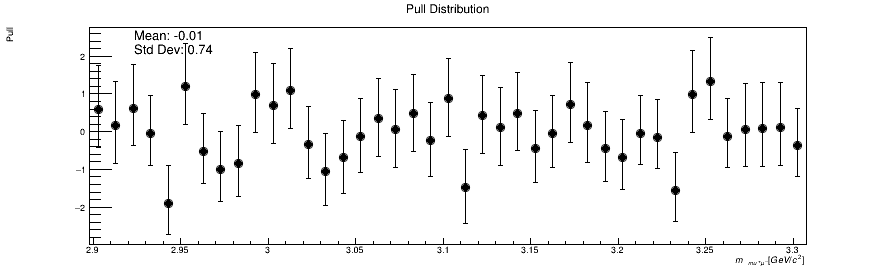

In [22]:
# Crie um frame a partir da variável 'mass' que está sendo ajustada
mass_frame = mass.frame(ROOT.RooFit.Title("Fit Results"))

# Plote os dados no frame
data.plotOn(mass_frame)

# Plote o modelo ajustado no frame
model.plotOn(mass_frame)

# Agora crie o histograma de pulls a partir do gráfico de ajuste
histpull = mass_frame.pullHist()

# Crie um novo frame para a distribuição de pulls
pull_frame = mass.frame(ROOT.RooFit.Title("Pull Distribution"))
pull_frame.addPlotable(histpull, "P")


can2 = ROOT.TCanvas("can2", "Pull Distribution", 900, 300)

# Ajuste o frame para o pull
pull_frame.GetXaxis().SetTitle("m_{#mu^+\mu^-} [GeV/c^2]")
pull_frame.GetYaxis().SetTitle("Pull")
pull_frame.GetYaxis().SetTitleOffset(1.6)

# Desenhe o gráfico de pull
can2.cd()
pull_frame.Draw()

# Calcular o mean e o desvio padrão dos pulls
mean_hist = histpull.GetMean()
stddev_hist = histpull.GetRMS()

mean_pull = np.mean(histpull.GetY())  # Calcula o valor médio (mean) dos pulls
sigma_pull = np.std(histpull.GetY())  # Calcula o desvio padrão (sigma) dos pulls
print(f"Mean of Pull: {mean_pull}")
print(f"Sigma (Standard Deviation) of Pull: {sigma_pull}")
# Adicionando o texto com o mean e o desvio padrão no gráfico de pull
latex = ROOT.TLatex()
latex.SetNDC()  # Para coordenadas normalizadas

# Desenhe o mean e stddev no gráfico
latex.DrawLatex(0.15, 0.85, f"Mean: {mean_pull:.2f}")
latex.DrawLatex(0.15, 0.80, f"Std Dev: {sigma_pull:.2f}")

# Exibir o canvas com a informação correta
can2.Draw()

In [23]:
# Workspace
wspace = ROOT.RooWorkspace("Jpsi fit")

getattr(wspace, "import")(data)
getattr(wspace, "import")(model)

wspace.writeToFile("Jpsi_fit.root")

#ROOT.DisableImplicitMT()

False

[#1] INFO:ObjectHandling -- RooWorkspace::import(Jpsi fit) importing dataset data
[#1] INFO:ObjectHandling -- RooWorkspace::import(Jpsi fit) importing RooRealVar::mass
[#1] INFO:ObjectHandling -- RooWorkspace::import(Jpsi fit) importing RooAddPdf::model
[#1] INFO:ObjectHandling -- RooWorkspace::import(Jpsi fit) importing RooGaussian::gauss
[#1] INFO:ObjectHandling -- RooWorkspace::import(Jpsi fit) importing RooRealVar::mean
[#1] INFO:ObjectHandling -- RooWorkspace::import(Jpsi fit) importing RooRealVar::sigma gauss
[#1] INFO:ObjectHandling -- RooWorkspace::import(Jpsi fit) importing RooRealVar::frac_gauss
[#1] INFO:ObjectHandling -- RooWorkspace::import(Jpsi fit) importing RooCBShape::crystal ball
[#1] INFO:ObjectHandling -- RooWorkspace::import(Jpsi fit) importing RooRealVar::sigma cb
[#1] INFO:ObjectHandling -- RooWorkspace::import(Jpsi fit) importing RooRealVar::alpha
[#1] INFO:ObjectHandling -- RooWorkspace::import(Jpsi fit) importing RooRealVar::n
[#1] INFO:ObjectHandling -- RooWo